<a href="https://colab.research.google.com/github/Sankytanky100/Data_Science-Projects/blob/main/Enhanced_Recovery_After_Surgery_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Evaluating the Impact of Cover Crops on Farm Yield Using Propensity Score Weighting and Regression Analysis**

In [1]:
!pip install rpy2


In [2]:
!apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
%load_ext rpy2.ipython



In [4]:
%%R
install.packages("cobalt")
library(cobalt)
install.packages("WeightIt")
library(WeightIt)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("rddtools", dependencies = TRUE)
library(rddtools)
install.packages("dplyr")
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
install.packages("rdd")
library(rdd)

(as ‘lib’ is unspecified)



















	‘/tmp/RtmprnquMJ/downloaded_packages’


(as ‘lib’ is unspecified)







	‘/tmp/RtmprnquMJ/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmprnquMJ/downloaded_packages’


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


(as ‘lib’ is unspecified)







	‘/tmp/RtmprnquMJ/downloaded_packages’

(as ‘lib’ is unspecified)

































































































































	‘/tmp/RtmprnquMJ/downloaded_packages’






[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]

Please consider citing R and rddtools,
citation()
citation("rddtools")


(as ‘lib’ is unspecified)







	‘/tmp/RtmprnquMJ/downloaded_packages’

Attaching package: ‘dplyr’



    recode



    filter, lag



    intersect, setdi

In [5]:
from google.colab import files
uploaded = files.upload()


Saving eras_df.csv to eras_df.csv


In [6]:
%%R

# Read in data
eras <- read.csv("eras_df.csv")

head(eras)


  year   hospital      los
1 2010 Hospital A 4.931446
2 2010 Hospital B 4.481862
3 2011 Hospital A 4.591706
4 2011 Hospital B 4.350371
5 2012 Hospital A 4.733123
6 2012 Hospital B 4.177808


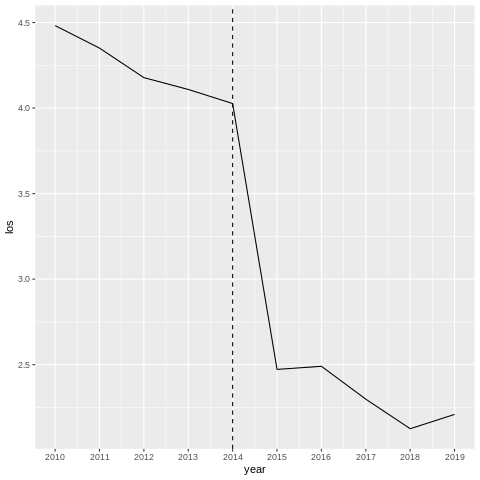

In [7]:
%%R
# Line plot for Hospital B
eras %>%
  filter(hospital == "Hospital B") %>%  # Filter to only Hospital B
  ggplot(aes(x = year, y = los)) +      # LOS over time
  geom_line() +                         # Add line plot
  geom_vline(xintercept = 2014, linetype = "dashed") + # Vertical line at 2014
  scale_x_continuous(breaks = c(2010:2019))           # Set x-axis scale



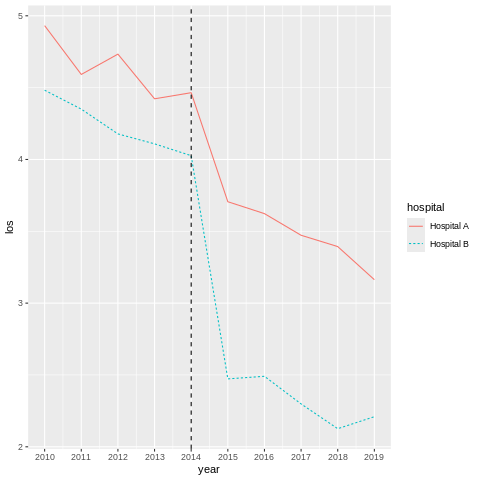

In [8]:
%%R
# Line plot for both hospitals
ggplot(
  data = eras,
  aes(x = year, y = los, color = hospital, linetype = hospital)
) +
  geom_line() +                                        # Add line plot
  geom_vline(xintercept = 2014, linetype = "dashed") + # Vertical line at 2014
  scale_x_continuous(breaks = c(2010:2019))           # Set x-axis scale


In [9]:
%%R
# Restrict data to 2014-2015
eras2 <- eras %>% filter(year == 2014 | year == 2015)

# View restricted dataset
eras2


  year   hospital      los
1 2014 Hospital A 4.464623
2 2014 Hospital B 4.026384
3 2015 Hospital A 3.705750
4 2015 Hospital B 2.472485


In [10]:
%%R
# Calculate differences within hospitals
Bdiff <- eras2$los[4] - eras2$los[2]
Adiff <- eras2$los[3] - eras2$los[1]

# Print differences
Bdiff
Adiff


[1] -0.7588729


In [11]:
%%R
# Calculate the difference in differences
DID <- Bdiff - Adiff

# Print DID
DID


[1] -0.7950255


In [12]:
%%R
# Create indicators
eras2$treat <- ifelse(eras2$hospital == "Hospital B", 1, 0)
eras2$time <- ifelse(eras2$year == 2015, 1, 0)

# View dataset with indicators
head(eras2)


  year   hospital      los treat time
1 2014 Hospital A 4.464623     0    0
2 2014 Hospital B 4.026384     1    0
3 2015 Hospital A 3.705750     0    1
4 2015 Hospital B 2.472485     1    1


In [13]:
%%R
# Fit linear model with interaction between treat and time
hospital_model <- lm(los ~ treat * time, data = eras2)

# View model summary
summary(hospital_model)



Call:
lm(formula = los ~ treat * time, data = eras2)

Residuals:
ALL 4 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   4.4646        NaN     NaN      NaN
treat        -0.4382        NaN     NaN      NaN
time         -0.7589        NaN     NaN      NaN
treat:time   -0.7950        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 3 and 0 DF,  p-value: NA



In [14]:
%%R
# Print ATT
ATT <- hospital_model$coefficients[4]

# View ATT
ATT


treat:time 
-0.7950255 
